In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

os.chdir('/content/drive/MyDrive/CV_Project/')

In [4]:
# !pip install torchvision
# !pip install torch

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import cv2

path = 'facial-keypoints-detection/'
train_data = pd.read_csv(f'{path}/training.csv')
print(train_data.shape)
train_data.head(2)

(7049, 31)


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [7]:
# import cv2
# def save_images(data, indexes):
#   for j,i in enumerate(indexes):
#     image = np.fromstring(data.loc[i, 'Image'], sep=' ').astype(np.float32)\
#                 .reshape(-1, IMG_SIZE)
#     cv2.imwrite(f'{path}/images/img_{i}.jpg',image)

# indexes_train = train_data.index
# save_images(train_data,indexes_train )

In [8]:
IMG_SIZE = 96 # image size 96 x 96 pixels

def show_images(data, Indexes, figsize=(15,10)):
  '''
    Show images with keypoints in grids
    Args:
        data (DataFrame): data (M x N)
        Indexes (iterators): list, Range, Indexes
        figsize (float, float): width, height in inches
  '''
  PlotCols = 5
  HighlightColorChannel = 1
  PlotRows = len(Indexes) // PlotCols + 1
  plt.figure(figsize=figsize)
  for j, i in enumerate(Indexes):

    image = np.fromstring(data.loc[i, 'Image'], sep=' ').astype(np.float32)\
                .reshape(-1, IMG_SIZE)
    mat4 = np.zeros(IMG_SIZE*IMG_SIZE*3, int)
    mat4 = mat4.reshape(IMG_SIZE,IMG_SIZE,3)
    mat4[:,:,0] = image
    mat4[:,:,1] = image
    mat4[:,:,2] = image

    keypointsArray = data.loc[i].drop('Image').values.astype(np.float32)\
                        .reshape(-1, 2)
    for keypoint in keypointsArray:
      if(keypoint[0] > 0 and keypoint[1] > 0):
        x = int(keypoint[1])
        y = int(keypoint[0])
        mat4[x][y][HighlightColorChannel] = 255
        mat4[x][y-1][HighlightColorChannel] = 255
        mat4[x-1][y][HighlightColorChannel] = 255
        mat4[x-1][y-1][HighlightColorChannel] = 255

    plt.subplot(PlotRows, PlotCols, j + 1)
    plt.title(f'Sample #{i}')
    plt.axis('off')
    plt.tight_layout()
    plt.imshow(mat4, cmap='gray')
  plt.show() 

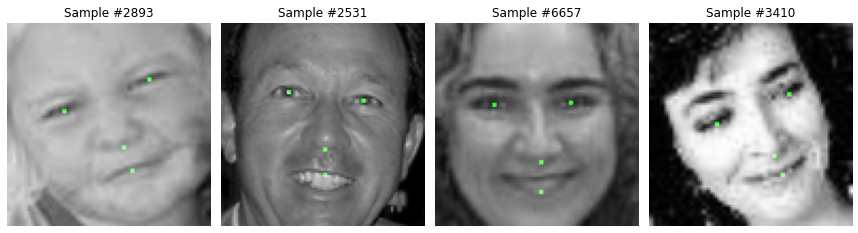

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

missing_any_data = train_data[train_data.isnull().any(axis=1)]
idxs = np.random.choice(missing_any_data.index, 4)
show_images(train_data, idxs)

In [10]:
test_data = pd.read_csv(f'{path}/test.csv')
test_data.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


### Preprocessing

In [11]:
#check dimensions of data

In [12]:
train_data.isna().sum()
#Apart from nose_tip_x, nose_tip_y, Image all the other columns have null values 

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

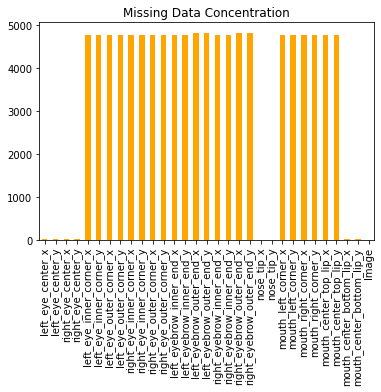

In [13]:
display(train_data.isnull().sum())
train_data.isnull().sum().plot(kind='bar',color = 'orange')
plt.title("Missing Data Concentration")
plt.show()

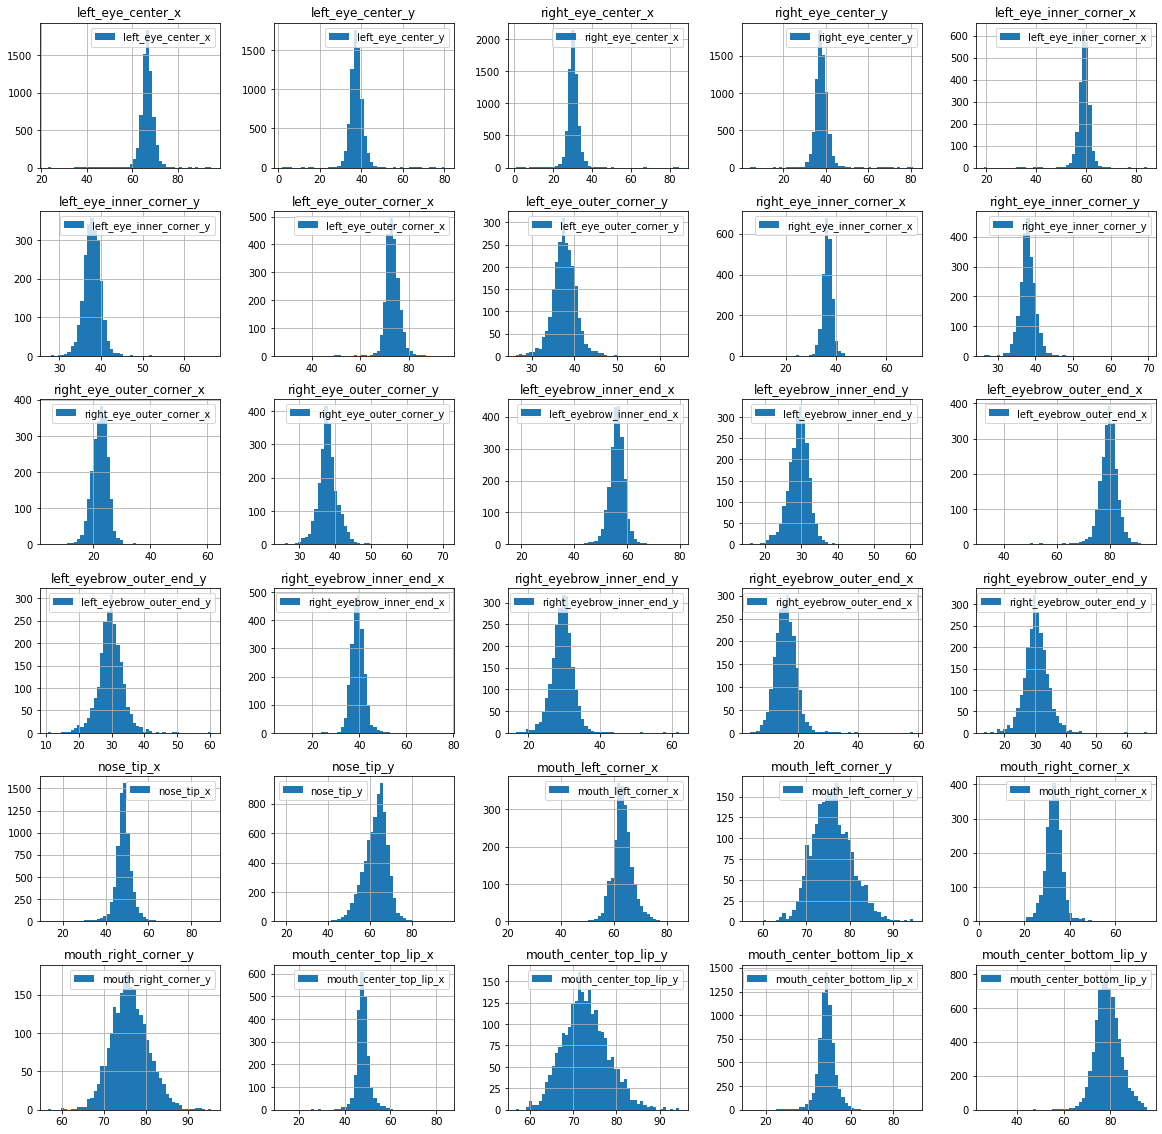

In [14]:
train_data.hist(bins=50, legend = True, figsize=(20,20))
plt.show()

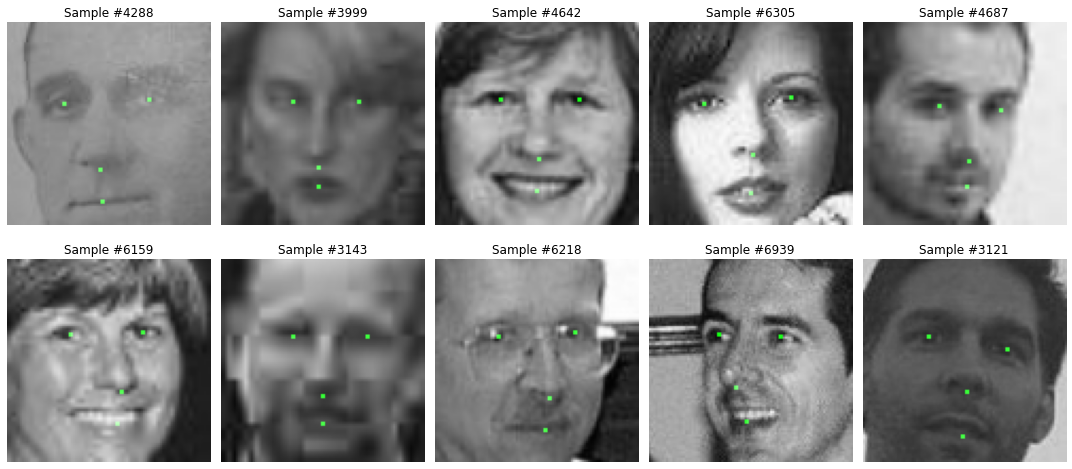

In [15]:
# View random missing-any-data images
idxs = missing_any_data.index
idxs = np.random.choice(idxs, 10)
show_images(train_data, idxs)

In [16]:
# Explore missing-bottom-lip-only data
missing_bottom_lip_only = train_data[(train_data.mouth_center_bottom_lip_x.isnull() & train_data.mouth_center_top_lip_x.notnull())]
missing_bottom_lip_only.T.tail(10)

,210,350,499,512,810,839,895,1058,1194,1230,1245,1546,1548,2199
nose_tip_y,61.2787,62.1639,58.1808,59.5908,57.7843,65.5464,59.7368,63.2299,64.6277,73.573,62.8202,66.0615,68.0685,74.8911
mouth_left_corner_x,57.8848,57.029,56.9185,64.7701,65.1619,65.8893,62.9833,57.488,66.7683,62.7577,71.4979,70.4921,73.66,83.3142
mouth_left_corner_y,87.4592,86.7783,85.4828,82.8008,83.2227,86.8986,85.9832,86.9412,82.6614,94.3122,81.4839,83.7682,87.2296,93.8066
mouth_right_corner_x,34.2931,36.251,28.1978,33.8235,28.7133,27.7611,34.2133,30.7513,21.903,29.3806,25.4452,30.042,31.7304,44.2838
mouth_right_corner_y,85.1578,87.0976,81.9372,82.449,82.4632,88.0423,85.4784,86.32,79.9367,92.6919,78.4135,84.8145,86.3279,95.5107
mouth_center_top_lip_x,46.377,45.2018,45.9269,48.2416,47.4206,48.3502,48.3462,45.6744,44.3935,44.9351,47.8594,49.9309,52.695,67.7019
mouth_center_top_lip_y,79.1162,79.1061,75.5544,71.5475,77.7858,85.3734,77.1501,81.6563,78.7847,89.1275,75.5729,80.3618,84.9753,94.5484
mouth_center_bottom_lip_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mouth_center_bottom_lip_y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Image,181 56 47 59 65 71 86 66 32 22 17 7 8 12 13 14...,59 41 36 32 32 31 33 41 55 72 79 70 64 50 52 6...,118 127 122 109 129 154 158 148 147 152 136 13...,194 194 194 191 194 191 191 183 166 151 126 86...,124 124 126 128 131 134 136 141 141 139 138 14...,33 28 25 30 46 67 64 92 169 175 175 183 189 18...,53 59 64 72 85 84 78 81 84 90 96 82 79 95 119 ...,79 85 87 89 88 87 87 51 16 18 17 14 8 5 10 13 ...,255 255 255 255 255 255 254 255 255 150 49 47 ...,254 250 190 99 52 41 38 37 36 32 29 28 28 30 2...,31 31 29 29 30 29 26 28 30 28 32 34 33 33 30 2...,49 54 49 40 35 38 37 33 32 32 41 42 41 38 34 3...,255 254 255 163 74 73 63 54 53 51 44 42 40 35 ...,26 26 33 30 22 25 21 20 18 20 40 54 44 33 33 4...


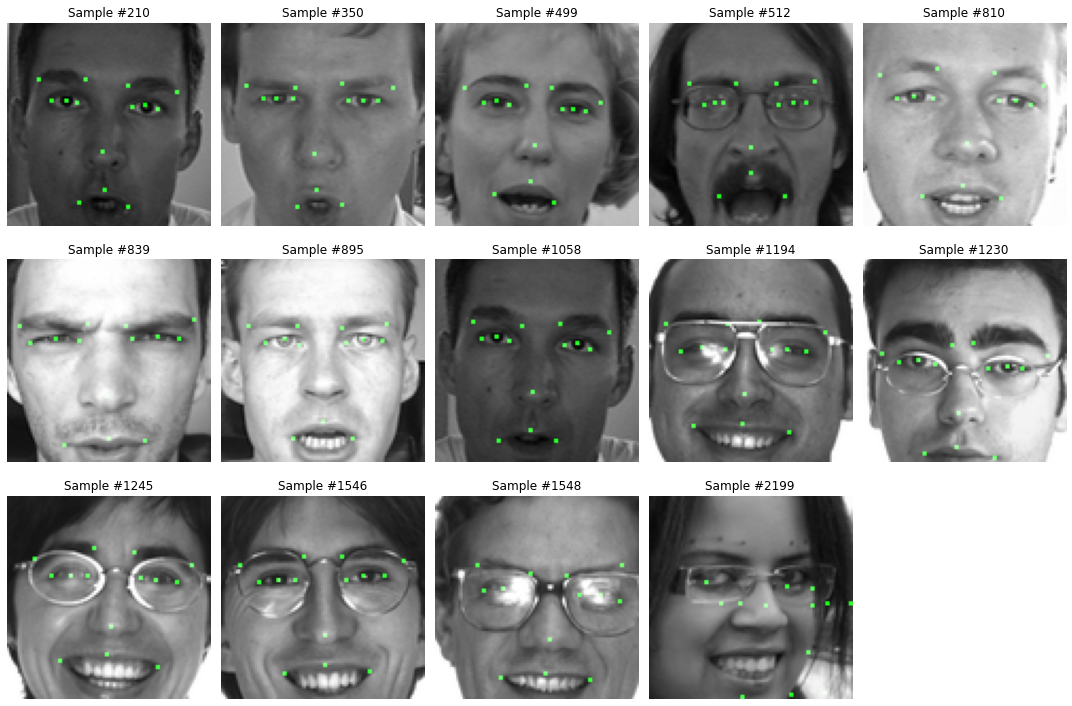

In [17]:
# View missing-bottom-lip-only images
idxs = missing_bottom_lip_only.index
show_images(train_data, idxs)

In [18]:
train_data.fillna(train_data.mean(), inplace=True)

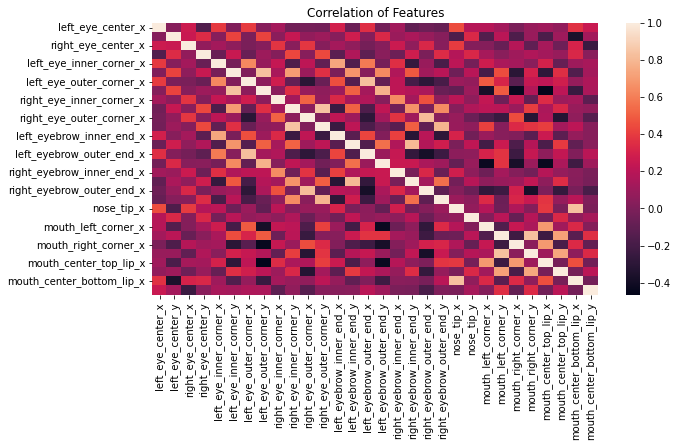

In [19]:
plt.figure(figsize =(10,5))
sns.heatmap(train_data.corr())
plt.title("Correlation of Features")
plt.show()

In [20]:
#@title Data Augmentation


In [21]:
horizontal_flip = True
rotation_augmentation = True
sample_image_index = 10
rotation_angles = [15]

In [22]:
def plot_sample(image, keypoint, axis, title):
    image = image.reshape(96,96)
    axis.imshow(image, cmap='gray')
    axis.scatter(keypoint[0::2], keypoint[1::2], marker='x', s=20)
    plt.title(title)

In [23]:
def load_images(image_data):
    images = []
    for idx, sample in image_data.iterrows():
        image = np.array(sample['Image'].split(' '), dtype=int)
        image = np.reshape(image, (96,96,1))
        images.append(image)
    images = np.array(images)/255.
    return images

def load_keypoints(keypoint_data):
    keypoint_data = keypoint_data.drop('Image',axis = 1)
    keypoint_features = []
    for idx, sample_keypoints in keypoint_data.iterrows():
        keypoint_features.append(sample_keypoints)
    keypoint_features = np.array(keypoint_features, dtype = 'float')
    return keypoint_features

In [24]:
train_images = load_images(train_data)
print("Shape of clean_train_images: {}".format(np.shape(train_images)))
train_keypoints = load_keypoints(train_data)
print("Shape of clean_train_keypoints: {}".format(np.shape(train_keypoints)))

Shape of clean_train_images: (7049, 96, 96, 1)
Shape of clean_train_keypoints: (7049, 30)


Shape of flipped_train_images: (7049, 96, 96, 1)
Shape of flipped_train_keypoints: (7049, 30)


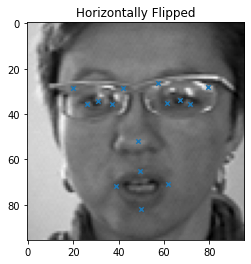

In [25]:
def left_right_flip(images, keypoints):
    flipped_keypoints = []
    flipped_images = np.flip(images, axis=2)   # Flip column-wise (axis=2)
    for idx, sample_keypoints in enumerate(keypoints):
        flipped_keypoints.append([96.-coor if idx%2==0 else coor for idx,coor in enumerate(sample_keypoints)])    # Subtract only X co-ordinates of keypoints from 96 for horizontal flipping
    return flipped_images, flipped_keypoints

if horizontal_flip:
    flipped_train_images, flipped_train_keypoints = left_right_flip(train_images, train_keypoints)
    print("Shape of flipped_train_images: {}".format(np.shape(flipped_train_images)))
    print("Shape of flipped_train_keypoints: {}".format(np.shape(flipped_train_keypoints)))
    train_images = np.concatenate((train_images, flipped_train_images))
    train_keypoints = np.concatenate((train_keypoints, flipped_train_keypoints))
    fig, axis = plt.subplots()
    plot_sample(flipped_train_images[sample_image_index], flipped_train_keypoints[sample_image_index], axis, "Horizontally Flipped") 

Horizontal Flip Augmentation: 


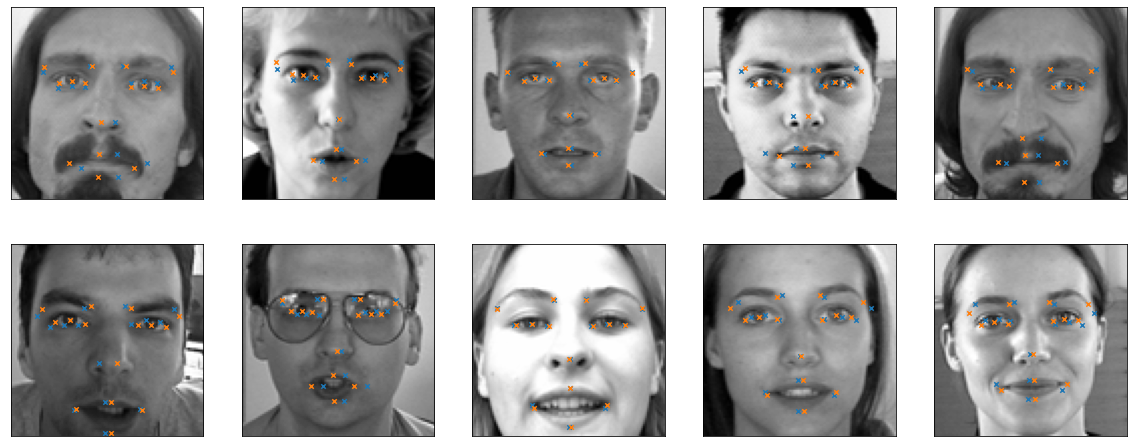

In [70]:
if horizontal_flip:
    print("Horizontal Flip Augmentation: ")
    fig = plt.figure(figsize=(20,8))
    for i in range(10):
        axis = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
        plot_sample(flipped_train_images[i], flipped_train_keypoints[i], axis, "")
        axis = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
        plot_sample(train_images[i], train_keypoints[i], axis, "")
    plt.show()

Augmenting for angles (in degrees): 
15  -15  
Shape of rotated_train_images: (28196, 96, 96, 1)
Shape of rotated_train_keypoints: (28196, 30)



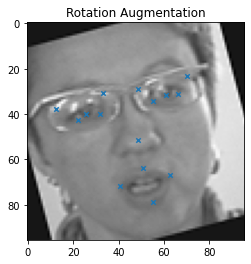

In [27]:
import math
def rotate_augmentation(images, keypoints):
    rotated_images = []
    rotated_keypoints = []
    print("Augmenting for angles (in degrees): ")
    for angle in rotation_angles:    # Rotation augmentation for a list of angle values
        for angle in [angle,-angle]:
            print(f'{angle}', end='  ')
            M = cv2.getRotationMatrix2D((48,48), angle, 1.0)
            angle_rad = -angle*math.pi/180.     # Obtain angle in radians from angle in degrees (notice negative sign for change in clockwise vs anti-clockwise directions from conventional rotation to cv2's image rotation)
            # For train_images
            for image in images:
                rotated_image = cv2.warpAffine(image, M, (96,96), flags=cv2.INTER_CUBIC)
                rotated_images.append(rotated_image)
            # For train_keypoints
            for keypoint in keypoints:
                rotated_keypoint = keypoint - 48.    # Subtract the middle value of the image dimension
                for idx in range(0,len(rotated_keypoint),2):
                    rotated_keypoint[idx] = rotated_keypoint[idx]*math.cos(angle_rad)-rotated_keypoint[idx+1]*math.sin(angle_rad)
                    rotated_keypoint[idx+1] = rotated_keypoint[idx]*math.sin(angle_rad)+rotated_keypoint[idx+1]*math.cos(angle_rad)
                rotated_keypoint += 48.   # Add the earlier subtracted value
                rotated_keypoints.append(rotated_keypoint)
            
    return np.reshape(rotated_images,(-1,96,96,1)), rotated_keypoints

if rotation_augmentation:
    rotated_train_images, rotated_train_keypoints = rotate_augmentation(train_images, train_keypoints)
    print("\nShape of rotated_train_images: {}".format(np.shape(rotated_train_images)))
    print("Shape of rotated_train_keypoints: {}\n".format(np.shape(rotated_train_keypoints)))
    train_images = np.concatenate((train_images, rotated_train_images))
    train_keypoints = np.concatenate((train_keypoints, rotated_train_keypoints))
    fig, axis = plt.subplots()
    plot_sample(rotated_train_images[sample_image_index], rotated_train_keypoints[sample_image_index], axis, "Rotation Augmentation")

Rotation Augmentation: 


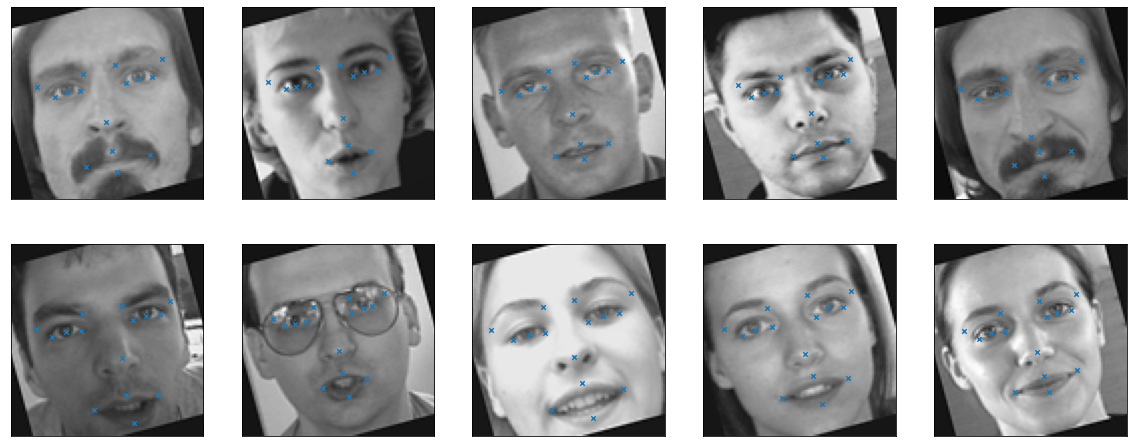

In [28]:
if rotation_augmentation:
    print("Rotation Augmentation: ")
    fig = plt.figure(figsize=(20,8))
    for i in range(10):
        axis = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
        plot_sample(rotated_train_images[i], rotated_train_keypoints[i], axis, "")
    plt.show()

In [86]:
#Histogram equalization

def histogramEqualize(image):
    a = image
    row,col = image.shape
    
    h=np.zeros(255);            #Initialize histogram bins array
    sum=0

    #Compute histogram
    for k in range(0,255):
        for i in range(0,row):
            for j in range(0,col): 
                if (a[i,j] == k):
                    h[k] = h[k] + 1
        sum = sum + h[k];

    #calculate probability
    p=np.zeros(255)
    for k in range(0, 255):
        p[k]=(h[k]/sum)

    #calculate cdf of probability
    cdf=np.zeros(255)
    s=np.zeros(255)
    cdf[0] = p[0]
    for k in range(0, 255):
        cdf[k] = p[k]+ cdf[k-1]

    #cdf * 255
    cdf255=np.zeros(255)
    for i in range(0, 255):
        cdf255[i] = cdf[i]*255
    
    #Map r to s
    s = np.round(cdf255)
    ps = np.zeros(255)
    for i in range(0, 255):
        for j in range(0, 255):
            if(s[j]==i):
                ps[i] = ps[i]+p[j]

    #replace grey levels according to mapping
    for i in range(0, row):
        for j in range(0, col):
          if(int(a[i,j]) <= 254):
            a[i,j]=s[int(a[i,j])]
    return a

def histogramEqualizeDisplay(data, Indexes, figsize=(18,10)):
  '''
    Show images with keypoints in grids
    Args:
        data (DataFrame): data (M x N)
        Indexes (iterators): list, Range, Indexes
        figsize (float, float): width, height in inches
  '''
  PlotCols = 6
  HighlightColorChannel = 1
  PlotRows = 3*(len(Indexes) // PlotCols + 1)
  plt.figure(figsize=figsize)
  for main_j, main_i in enumerate(Indexes):

    image = np.fromstring(data.loc[main_i, 'Image'], sep=' ').astype(np.float32)\
                .reshape(-1, IMG_SIZE)
    a = image
    row,col = image.shape
    
    h=np.zeros(255);            #Initialize histogram bins array
    sum=0

    #Compute histogram
    for k in range(0,255):
        for i in range(0,row):
            for j in range(0,col): 
                if (a[i,j] == k):
                    h[k] = h[k] + 1
        sum = sum + h[k];
    a = histogramEqualize(a)

    #Recompute histogram
    h1=np.zeros(255);
    sum=0
    for k in range(0,255):
        for i in range(0,row):
            for j in range(0,col): 
                if (a[i,j] == k):
                    h1[k] = h1[k] + 1
        sum = sum + h1[k];

    mat4 = np.zeros(IMG_SIZE*IMG_SIZE*3, int)
    mat4 = mat4.reshape(IMG_SIZE,IMG_SIZE,3)
    mat4[:,:,0] = a
    mat4[:,:,1] = a
    mat4[:,:,2] = a

    keypointsArray = data.loc[main_i].drop('Image').values.astype(np.float32)\
                        .reshape(-1, 2)
    for keypoint in keypointsArray:
      if(keypoint[0] > 0 and keypoint[1] > 0):
        x = int(keypoint[1])
        y = int(keypoint[0])
        mat4[x][y][HighlightColorChannel] = 255
        mat4[x][y-1][HighlightColorChannel] = 255
        mat4[x-1][y][HighlightColorChannel] = 255
        mat4[x-1][y-1][HighlightColorChannel] = 255

    plt.subplot(PlotRows, PlotCols, 3*(main_j + 1))
    plt.title(f'Sample #{main_i}')
    plt.axis('off')
    plt.tight_layout()
    plt.imshow(mat4, cmap='gray')
    plt.subplot(PlotRows, PlotCols, (3*main_j + 1))
    plt.title(f'Original bins #{main_i}')
    plt.tight_layout()
    plt.plot(h)
    plt.subplot(PlotRows, PlotCols, (3*main_j + 2))
    plt.title(f'Equalized bins #{main_i}')
    plt.tight_layout()
    plt.plot(h1)
  plt.show() 

def histogramEqualizeAppendAll(data):
    for index, row in data.iterrows():
      #print(row['left_eye_center_x'], row['Image'])
      a = image = np.fromstring(row['Image'], sep=' ').astype(np.float32)\
                .reshape(-1, IMG_SIZE)
      #plt.imshow(a,  cmap='gray')

      #Histogram equalize image
      a = histogramEqualize(a)

      appendImagetoDataframe(row, a)
      print(index)

def appendImagetoDataframe(row, image):
  global aug_data
  aug_data = pd.DataFrame()
  #Convert image array to string for data frame
  image = image.reshape(IMG_SIZE * IMG_SIZE)
  ImgStr = [str(int(pixel)) for pixel in image]
  FinalStr = " ".join(ImgStr)

  #Replace orginal image string with the new one
  row['Image'] = FinalStr

  #Append the row
  aug_data = aug_data.append(row, ignore_index=True)
  #train_data.head(1)


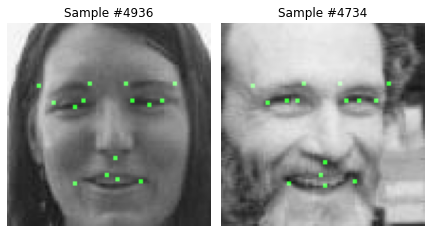

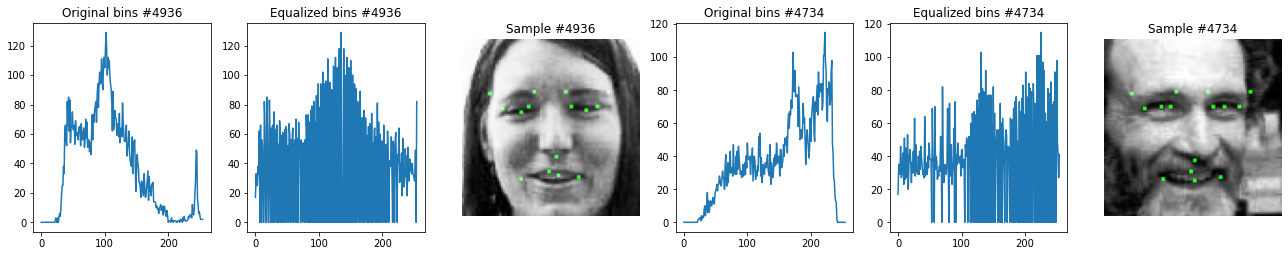

In [87]:
#Histogram equalization
idxs = np.random.choice(missing_any_data.index, 2)
#Before histogram equalization
show_images(train_data, idxs)

#After histogram equalization
histogramEqualizeDisplay(train_data, idxs)

In [ ]:
#Apply Gaussian Filter
import numpy as np
from google.colab.patches import cv2_imshow
def linear_filter(data,Indexes, kernel):
  for main_j, main_i in enumerate(Indexes):
    img_in = np.fromstring(data.loc[main_i, 'Image'], sep=' ').astype(np.float32)\
                .reshape(-1, IMG_SIZE)
    # DataRow = data.loc[[main_i]]
    img_in = np.reshape(img_in, (96,96,1))
    height, width,x = img_in.shape
    # print(len(img_in.shape))
    ksize = len(kernel)
    
    if(len(img_in.shape) == 3):
        image_pad = np.pad(img_in, pad_width=((ksize // 2, ksize // 2),(ksize // 2, ksize // 2),(0,0)), mode='constant', constant_values=0).astype(np.float32)
    elif(len(img_in.shape) == 2):
        image_pad = np.pad(img_in, pad_width=((ksize // 2, ksize // 2),(ksize // 2, ksize // 2)), mode='constant', constant_values=0).astype(np.float32)
    
    
    h = ksize // 2
    w = ksize // 2
    
    image_conv = np.zeros(image_pad.shape)
    
    for i in range(h, image_pad.shape[0]-h):
        for j in range(w, image_pad.shape[1]-w):
            #sum = 0
            x = image_pad[i-h:i-h+ksize, j-w:j-w+ksize]
            x = x.flatten()*kernel.flatten()
            image_conv[i][j] = x.sum()
    h_end = -h
    w_end = -w
  
    if(h == 0):
        return image_conv[h:,w:w_end]
    if(w == 0):
        return image_conv[h:h_end,w:]
  return image_conv[h:h_end,w:w_end]


sum = 0
sigma = 1.5
filter_size = 9
gaussian_filter = np.zeros((filter_size, filter_size), np.float32)
for x in range(0, filter_size):
  for y in range(0,filter_size):
    x1 = 2*np.pi*(sigma**2)
    x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
    gaussian_filter[x, y] = (1/x1)*x2
    sum = sum + gaussian_filter[x, y]
# Normalize the kernel
for x in range(0, filter_size):
  for y in range(0,filter_size):
    gaussian_filter[x][y] /= sum;

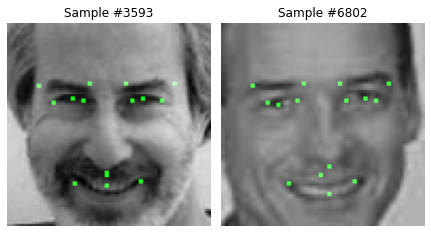

In [88]:
#Gaussian Filter

idxs_gaus = np.random.choice(train_data.index, 2)
show_images(train_data, idxs_gaus)



In [29]:
train_keypoints.shape

(42294, 30)

In [30]:
cols = ['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y']

In [31]:
# final=np.array([train_images,train_keypoints])
# train_final=pd.DataFrame(train_keypoints)
train_final=pd.DataFrame(data=train_keypoints[0:,0:], index=[i for i in range(train_keypoints.shape[0])], columns=cols)
# train_final.head()

a,b,c,d = train_images.shape
img = ''
lis = []

for i in range(a):
    x = train_images[i].reshape(96*96)
    
    ImgStr = [str(int(pixel*255)) for pixel in x]
    FinalStr = " ".join(ImgStr)
    FinalStr
    lis.append(FinalStr)

final_img = pd.DataFrame(lis, columns=['Image'])

# train_img = pd.DataFrame(data=train_images, index=[i for i in range(train_images.shape[0])])
# train_img = pd.DataFrame()
# trainn_img.column = 'Image'
# for image in train_images:
  
# train_img.head()

train_final = pd.concat([train_final, final_img],axis=1)


In [32]:
train_data.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [81]:
train_final.shape

(42294, 31)

In [34]:
#Modeling 

In [35]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms, utils

from torch import nn, optim
import torch.nn.functional as F

import warnings
warnings.filterwarnings('ignore')


class FaceKeypointsDataset(Dataset):
    '''Face Keypoints Dataset'''
    def __init__(self, dataframe, train=True, transform=None):
        '''
        Args:
            dataframe (DataFrame): data in pandas dataframe format.
            train (Boolean) : True for train data with keypoints, default is True
            transform (callable, optional): Optional transform to be applied on 
            sample
        '''
        self.dataframe = dataframe
        self.train = train
        self.transform = transform
    
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        image = np.fromstring(self.dataframe.iloc[idx, -1], sep=' ')\
                .astype(np.float32).reshape(-1, IMG_SIZE)
        if self.train:
            keypoints = self.dataframe.iloc[idx, :-1].values.astype(np.float32)
        else:
            keypoints = None
        sample = {'image': image, 'keypoints': keypoints}
        if self.transform:
            sample = self.transform(sample)
        return sample

In [36]:
class Normalize(object):
    '''Normalize input images'''
    
    def __call__(self, sample):
        image, keypoints = sample['image'], sample['keypoints']
        
        return {'image': image / 255., # scale to [0, 1]
                'keypoints': keypoints}
        
class ToTensor(object):
    '''Convert ndarrays in sample to Tensors.'''

    def __call__(self, sample):
        image, keypoints = sample['image'], sample['keypoints']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image.reshape(1, IMG_SIZE, IMG_SIZE)
        image = torch.from_numpy(image)
        
        if keypoints is not None:
            keypoints = torch.from_numpy(keypoints)
            return {'image': image, 'keypoints': keypoints}
        else:
            return {'image': image}

In [37]:
from torch.utils.data.sampler import SubsetRandomSampler

def prepare_train_valid_loaders(trainset, valid_size=0.2, 
                                batch_size=128):
    '''
    Split trainset data and prepare DataLoader for training and validation
    
    Args:
        trainset (Dataset): data 
        valid_size (float): validation size, defalut=0.2
        batch_size (int) : batch size, default=128
    ''' 
    
    # obtain training indices that will be used for validation
    num_train = len(trainset)
    indices = list(range(num_train))
    np.random.shuffle(indices)
    split = int(np.floor(valid_size * num_train))
    train_idx, valid_idx = indices[split:], indices[:split]
    
    # define samplers for obtaining training and validation batches
    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)
    
    # prepare data loaders
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                               sampler=train_sampler)
    valid_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                               sampler=valid_sampler)
    
    return train_loader, valid_loader

In [71]:
# Train_data is treated with missing values and data augmentation is done
train_df = train_final
# train_df = train_data
test_df = test_data

# how many samples per batch to load
batch_size = 128
# percentage of training set to use as validation
valid_size = 0.2

# Define a transform to normalize the data
tsfm = transforms.Compose([Normalize(), ToTensor()])

# Load the training data and test data
trainset = FaceKeypointsDataset(train_df, transform=tsfm)
testset = FaceKeypointsDataset(test_df, train=False, transform=tsfm)

# prepare data loaders
train_loader, valid_loader = prepare_train_valid_loaders(trainset, 
                                                         valid_size,
                                                         batch_size)

test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size)

In [93]:
from torch import nn, optim
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self, input_size, output_size, hidden_layers, drop_p =0.5):
        
        '''
        Buid a forward network with arbitrary hidden layers.
        
        Arguments
            ---------
            input_size (integer): size of the input layer
            output_size (integer): size of the output layer
            hidden_layers (list of integers):, the sizes of each hidden layers
        '''
        
        super(MLP, self).__init__()
        
        # hidden layers
        layer_sizes = [(input_size, hidden_layers[0])] \
                      + list(zip(hidden_layers[:-1], hidden_layers[1:]))
        self.hidden_layers = nn.ModuleList([nn.Linear(h1, h2) 
                                            for h1, h2 in layer_sizes])
        
        self.output = nn.Linear(hidden_layers[-1], output_size)
        
        self.dropout = nn.Dropout(drop_p)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        # flatten inputs
        x = x.view(x.shape[0], -1)
        
        for layer in self.hidden_layers:
            x = F.relu(layer(x))
            x = self.dropout(x)
        x = self.output(x)    
        return x

In [94]:
model = MLP(input_size=IMG_SIZE*IMG_SIZE, output_size=30, 
            hidden_layers=[128, 64], drop_p=0.1)

In [95]:
model

MLP(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=9216, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=64, bias=True)
  )
  (output): Linear(in_features=64, out_features=30, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [96]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [97]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [101]:
def train(train_loader, valid_loader, model, criterion, optimizer, 
          n_epochs=50, saved_model='model.pt'):
    '''
    Train the model
    
    Args:
        train_loader (DataLoader): DataLoader for train Dataset
        valid_loader (DataLoader): DataLoader for valid Dataset
        model (nn.Module): model to be trained on
        criterion (torch.nn): loss funtion
        optimizer (torch.optim): optimization algorithms
        n_epochs (int): number of epochs to train the model
        saved_model (str): file path for saving model
    
    Return:
        tuple of train_losses, valid_losses
    '''

    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf # set initial "min" to infinity

    train_losses = []
    valid_losses = []

    for epoch in range(n_epochs):
        # monitor training loss
        train_loss = 0.0
        valid_loss = 0.0

        ###################
        # train the model #
        ###################
        model.train() # prep model for training
        for batch in train_loader:
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(batch['image'].to(device))
            # calculate the loss
            loss = criterion(output, batch['keypoints'].to(device))
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update running training loss
            train_loss += loss.item()*batch['image'].size(0)

        ######################    
        # validate the model #
        ######################
        model.eval() # prep model for evaluation
        for batch in valid_loader:
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(batch['image'].to(device))
            # calculate the loss
            loss = criterion(output, batch['keypoints'].to(device))
            # update running validation loss 
            valid_loss += loss.item()*batch['image'].size(0)

        # print training/validation statistics 
        # calculate average Root Mean Square loss over an epoch
        train_loss = np.sqrt(train_loss/len(train_loader.sampler.indices))
        valid_loss = np.sqrt(valid_loss/len(valid_loader.sampler.indices))

        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'
              .format(epoch+1, train_loss, valid_loss))

        # save model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'
                  .format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), saved_model)
            valid_loss_min = valid_loss
            
    return train_losses, valid_losses  

In [ ]:
train_losses, valid_losses = train(train_loader, valid_loader, model,
                                   criterion, optimizer, n_epochs=50, 
                                   saved_model='model_aug.pt')

Epoch: 1 	Training Loss: 13.218924 	Validation Loss: 13.005718
Validation loss decreased (inf --> 13.005718).  Saving model ...
Epoch: 2 	Training Loss: 13.193892 	Validation Loss: 12.917768
Validation loss decreased (13.005718 --> 12.917768).  Saving model ...
Epoch: 3 	Training Loss: 13.256561 	Validation Loss: 13.060239
Epoch: 4 	Training Loss: 13.273553 	Validation Loss: 13.031484
Epoch: 5 	Training Loss: 13.259162 	Validation Loss: 13.037142
Epoch: 6 	Training Loss: 13.247891 	Validation Loss: 13.038436
Epoch: 7 	Training Loss: 13.228367 	Validation Loss: 13.031005
Epoch: 8 	Training Loss: 13.221719 	Validation Loss: 13.067274
Epoch: 9 	Training Loss: 13.227161 	Validation Loss: 12.995606
Epoch: 10 	Training Loss: 13.218032 	Validation Loss: 13.002415


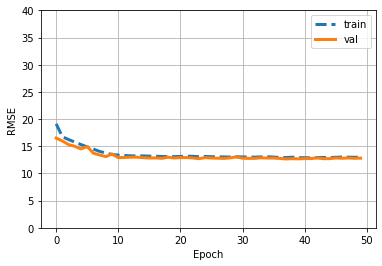

In [79]:
plot_RMSE(train_losses, valid_losses, y_max=40)

In [59]:
# Function to plot RMSE vs epochs
def plot_RMSE(train_losses, valid_losses, y_max=50):
    plt.plot(train_losses, "--", linewidth=3, label="train")
    plt.plot(valid_losses, linewidth=3, label="val")
    plt.legend()
    plt.grid()
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.ylim((0, y_max))
    plt.show()

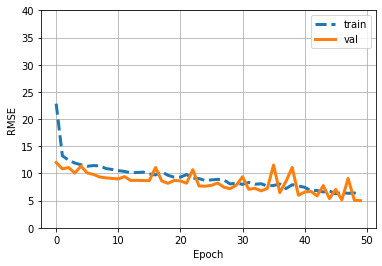

In [60]:
plot_RMSE(train_losses, valid_losses, y_max=40)

In [61]:
def predict(data_loader, model):
    '''
    Predict keypoints
    Args:
        data_loader (DataLoader): DataLoader for Dataset
        model (nn.Module): trained model for prediction.
    Return:
        predictions (array-like): keypoints in float (no. of images x keypoints).
    '''
    
    model.eval() # prep model for evaluation

    with torch.no_grad():
        for i, batch in enumerate(data_loader):
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(batch['image'].to(device)).cpu().numpy()
            if i == 0:
                predictions = output
            else:
                predictions = np.vstack((predictions, output))
    
    return predictions

In [89]:
def view_pred_df(columns, test_df, predictions, image_ids=range(1,6)):
    '''
    Display predicted keypoints
    Args:
        columns (array-like): column names
        test_df (DataFrame): dataframe with ImageId and Image columns
        predictions (array-like): keypoints in float (no. of images x keypoints)
        image_id (array-like): list or range of ImageIds begin at 1
    '''
    pred_df = pd.DataFrame(predictions, columns=columns)
    pred_df = pd.concat([pred_df, test_df], axis=1)
    pred_df = pred_df.set_index('ImageId')
    show_images(pred_df, image_ids)  # ImageId as index begin at 1

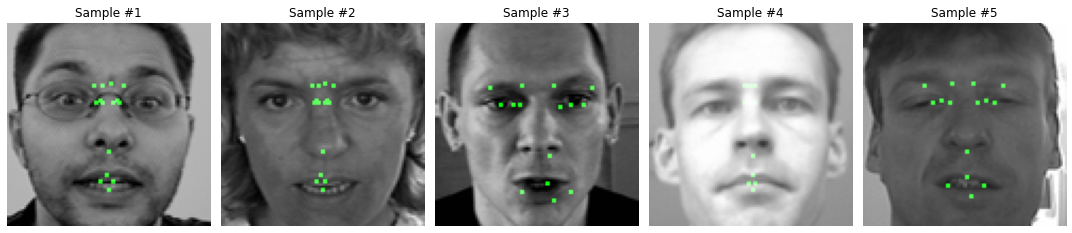

In [100]:
# Load the minimum valuation loss model
model.load_state_dict(torch.load('model.pt'))
predictions = predict(test_loader, model)
columns = train_df.drop('Image', axis=1).columns
view_pred_df(columns, test_df, predictions)